In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Reshape the images to match the expected input shape of the ImageDataGenerator
train_images = np.expand_dims(train_images, axis=-1)

In [9]:
# Create an instance of the ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
# Specify the number of augmented images to generate
num_augmented_images = 25

# Generate augmented images by applying transformations to the original images
augmented_images = []
for images in datagen.flow(train_images, batch_size=1, shuffle=False):
    augmented_images.append(images[0])
    if len(augmented_images) == num_augmented_images:
        break

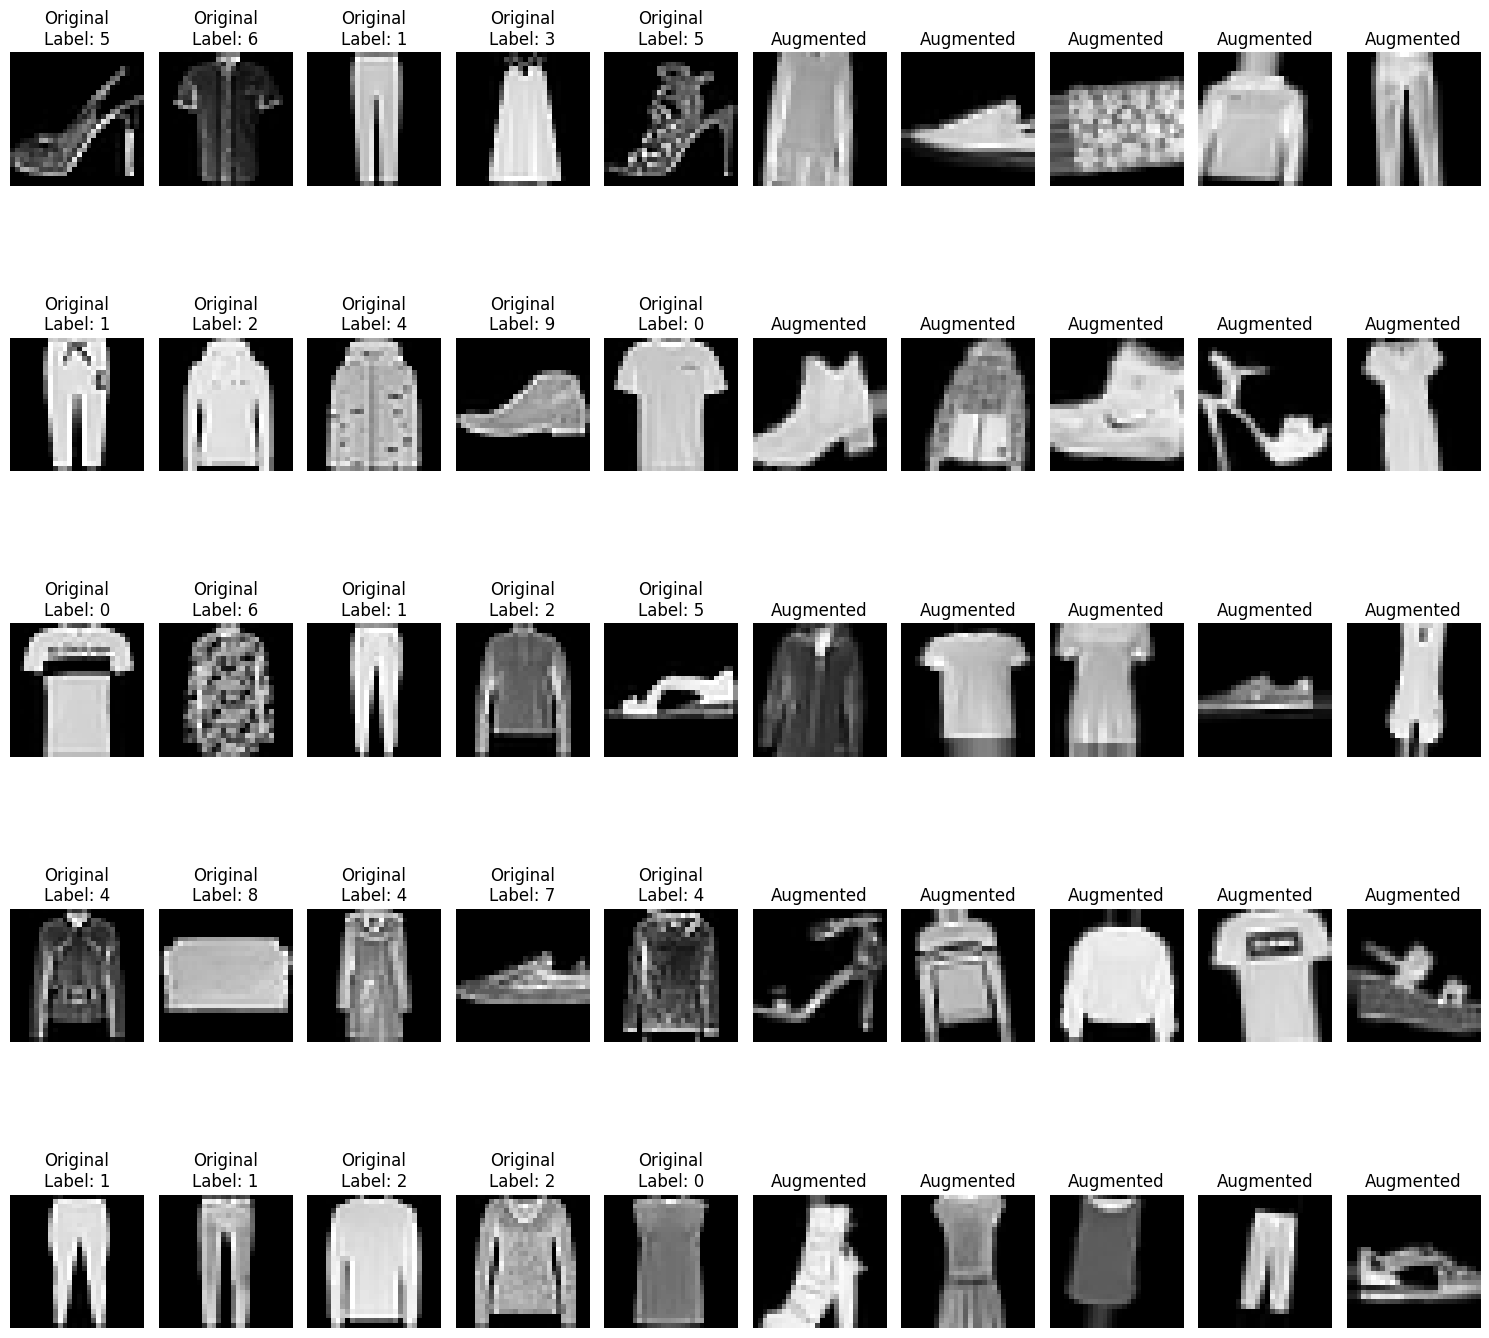

In [11]:
# Randomly select indices for original and augmented images
original_indices = np.random.choice(len(train_images), size=25, replace=False)
augmented_indices = np.random.choice(len(augmented_images), size=25, replace=False)

# Plot the images in a 5x10 grid, alternating between original and augmented
fig, axes = plt.subplots(5, 10, figsize=(15, 15))
axes = axes.flatten()

for i in range(25):
    row = i // 5  # Calculate the row index
    col = i % 5   # Calculate the column index

    # Plot original image
    original_image = train_images[original_indices[i]].squeeze()
    original_label = train_labels[original_indices[i]]
    axes[row * 10 + col].imshow(original_image, cmap='gray')
    axes[row * 10 + col].axis('off')
    axes[row * 10 + col].set_title(f"Original\nLabel: {original_label}")

    # Plot augmented image
    augmented_image = augmented_images[augmented_indices[i]].squeeze()
    axes[row * 10 + col + 5].imshow(augmented_image, cmap='gray')
    axes[row * 10 + col + 5].axis('off')
    axes[row * 10 + col + 5].set_title("Augmented")

plt.tight_layout()
plt.show()